In [9]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
X = census_income.data.features 
y = census_income.data.targets

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


df = X

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [12]:
df.drop('native-country', axis=1, inplace=True)
df.drop('fnlwgt', axis=1, inplace=True)
df.drop('occupation', axis=1, inplace=True)
df.drop('workclass', axis=1, inplace=True)

C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\2948696608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('native-country', axis=1, inplace=True)
C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\2948696608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('fnlwgt', axis=1, inplace=True)
C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\2948696608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('occupa

In [13]:
# 1. Tratar valores ausentes
# Imputação da moda para variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\332854770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


In [14]:
# Imputação da média para variáveis numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\3109486956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])


In [15]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\1940532558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\1940532558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\isac_\AppData\Local\Temp\ipykernel_1164\1940532558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [16]:
df.describe()

,age,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.288420,10.078089,2.618750,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382
std,13.710510,3.874492,2.570973,1.507703,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,9.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,11.000000,10.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,12.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,15.000000,16.000000,6.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   education       48842 non-null  int32  
 2   education-num   48842 non-null  float64
 3   marital-status  48842 non-null  int32  
 4   relationship    48842 non-null  int32  
 5   race            48842 non-null  int32  
 6   sex             48842 non-null  int32  
 7   capital-gain    48842 non-null  float64
 8   capital-loss    48842 non-null  float64
 9   hours-per-week  48842 non-null  float64
dtypes: float64(5), int32(5)
memory usage: 2.8 MB


In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [19]:
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.025996,-0.332542,1.136512,0.916138,-0.276685,0.392384,0.70422,0.146932,-0.217127,-0.034087
1,0.828308,-0.332542,1.136512,-0.410397,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-2.213032
2,-0.046942,0.183660,-0.419335,-1.736932,-0.276685,0.392384,0.70422,-0.144804,-0.217127,-0.034087
3,1.047121,-2.397350,-1.197259,-0.410397,-0.900852,-1.971746,0.70422,-0.144804,-0.217127,-0.034087
4,-0.776316,-0.332542,1.136512,-0.410397,2.219984,-1.971746,-1.42001,-0.144804,-0.217127,-0.034087
...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,-0.332542,1.136512,-1.736932,-0.276685,0.392384,-1.42001,-0.144804,-0.217127,-0.356894
48838,1.849433,0.183660,-0.419335,2.242673,0.347482,-1.971746,0.70422,-0.144804,-0.217127,-0.034087
48839,-0.046942,-0.332542,1.136512,-0.410397,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930
48840,0.390683,-0.332542,1.136512,-1.736932,0.971649,-3.153810,0.70422,0.587220,-0.217127,-0.034087


In [61]:
#dist_matrix = pairwise_distances(df_scaled)

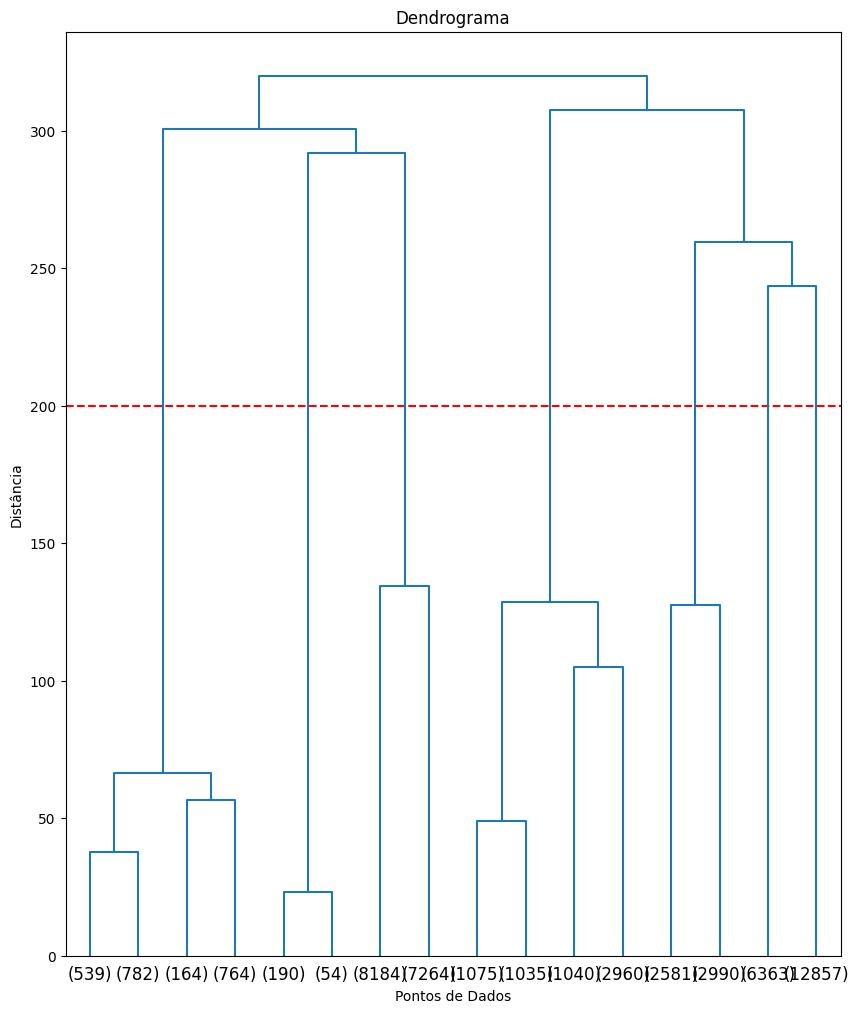

In [20]:
# Realizando o clustering hierárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='ward')
model.fit(df_scaled)

Z = linkage(df_scaled, method='ward')

# Plotando o dendrograma para ajudar a visualizar o corte
plt.figure(figsize=(10, 12))
plt.title("Dendrograma")
plt.xlabel("Pontos de Dados")
plt.ylabel("Distância")
plt.axhline(y=200, color='r', linestyle='--')  # Corte da distância
dendrogram(Z, truncate_mode="level", p=3, color_threshold=10)
plt.show()

In [25]:
# Aplicando o corte com a distância desejada (exemplo: 10)
cut_distance = 100
model = AgglomerativeClustering(distance_threshold=cut_distance, n_clusters=None, metric='euclidean', linkage='ward')
model.fit(df_scaled)

# Quantidade de clusters após o corte
num_clusters = len(np.unique(model.labels_))
print(f"Número de clusters encontrados: {num_clusters}")

Número de clusters encontrados: 16


In [26]:
# Cálculo das métricas
silhouette_avg = silhouette_score(df_scaled, model.labels_)
calinski_harabasz = calinski_harabasz_score(df_scaled, model.labels_)
davies_bouldin = davies_bouldin_score(df_scaled, model.labels_)

    # Exibe as métricas
print(f"Média do Silhouette Score: {silhouette_avg:.4f}")
print(f"Índice Calinski-Harabasz: {calinski_harabasz:.4f}")
print(f"Índice Davies-Bouldin: {davies_bouldin:.4f}")

Média do Silhouette Score: 0.2079
Índice Calinski-Harabasz: 6210.0045
Índice Davies-Bouldin: 1.4579
